In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

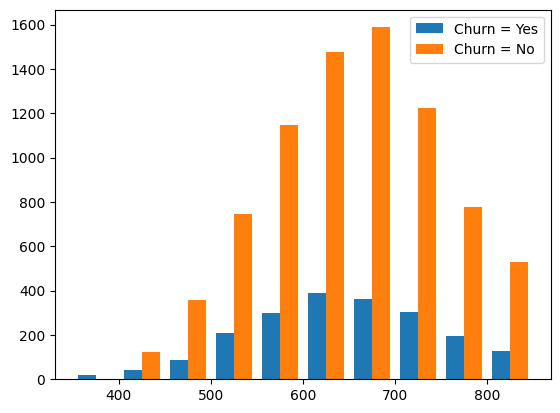

In [7]:
credit_churn = df[df['Exited'] == 1]['CreditScore']
credit_not_churn = df[df['Exited'] == 0]['CreditScore']
plt.hist([credit_churn, credit_not_churn], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

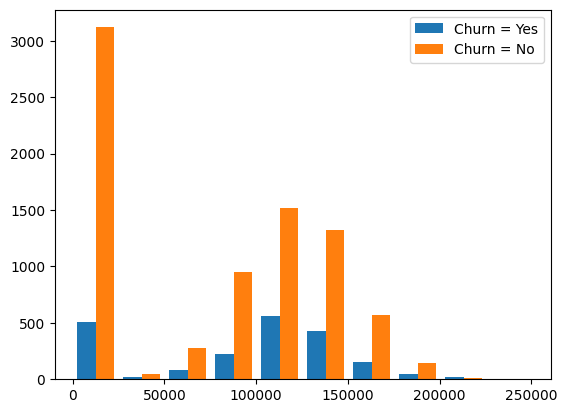

In [8]:
balance_churn = df[df['Exited'] == 1]['Balance']
balance_not_churn = df[df['Exited'] == 0]['Balance']
plt.hist([balance_churn, balance_not_churn], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

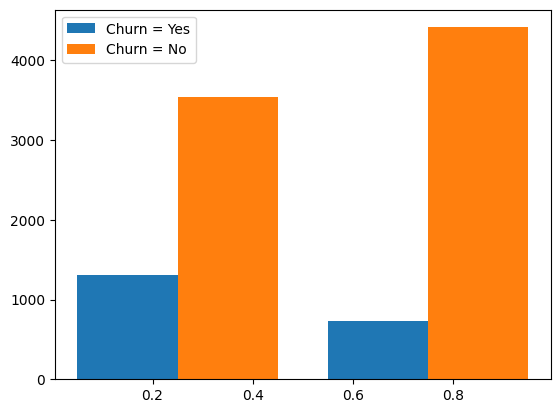

In [9]:
active_churn = df[df['Exited'] == 1]['IsActiveMember']
active_not_churn = df[df['Exited'] == 0]['IsActiveMember']
plt.hist([active_churn, active_not_churn], bins = 2, label = ['Churn = Yes', 'Churn = No'])
plt.legend()

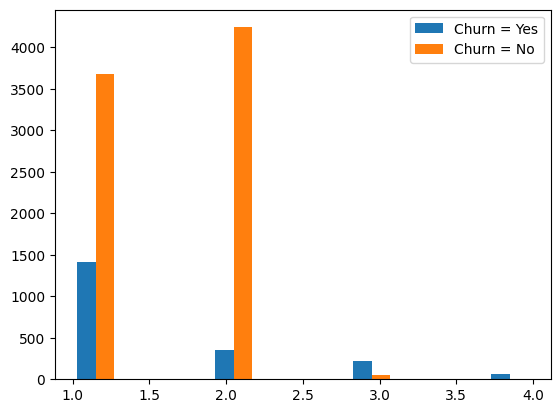

In [10]:
products_churn = df[df['Exited'] == 1]['NumOfProducts']
products_not_churn = df[df['Exited'] == 0]['NumOfProducts']
plt.hist([products_churn, products_not_churn], bins = 10, label = ['Churn = Yes', 'Churn = No'])
plt.legend()

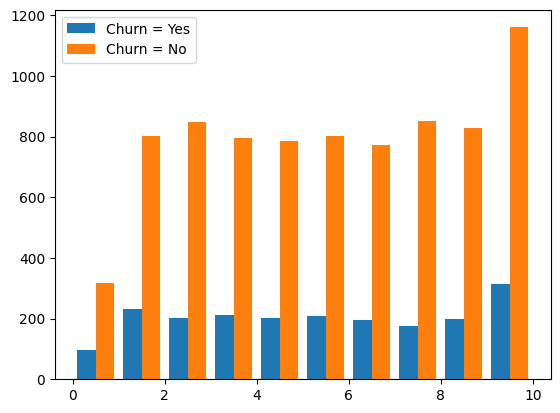

In [11]:
tenure_churn = df[df['Exited'] == 1]['Tenure']
tenure_not_churn = df[df['Exited'] == 0]['Tenure']
plt.hist([tenure_churn, tenure_not_churn], bins = 10, label = ['Churn = Yes', 'Churn = No'])
plt.legend()

In [12]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [13]:
def print_unique_values(df):
  for column in df:
    if (df[column].dtypes == 'object'):
      print(column, " : ", df[column].unique())

In [14]:
print_unique_values(df)

Geography  :  ['France' 'Spain' 'Germany']
Gender  :  ['Female' 'Male']


In [15]:
df['Gender'] = df['Gender'].replace({'Female' : 0, 'Male' : 1})

/tmp/ipython-input-15-516437053.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female' : 0, 'Male' : 1})


In [16]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
514,605,France,0,51,3,136188.78,1,1,1,67110.59,1
8187,603,Spain,0,39,5,162390.52,2,1,0,54702.66,0
3281,775,France,0,32,2,108698.96,2,1,1,161069.73,0


In [17]:
df = pd.get_dummies(df, dtype = int)

In [18]:
df.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6415,674,0,42,9,0.00,2,1,0,4292.72,0,1,0,0
8253,750,1,36,7,136492.92,3,1,1,26500.29,1,1,0,0
1546,701,0,48,1,92072.68,1,1,1,133992.36,0,0,1,0


In [19]:
scaler = MinMaxScaler()
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis = 1), df['Exited'], train_size = 0.8)

In [21]:
X_train.shape

(8000, 12)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7950 - loss: 0.5264
Epoch 2/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.4752
Epoch 3/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7993 - loss: 0.4620
Epoch 4/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7959 - loss: 0.4559
Epoch 5/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8092 - loss: 0.4446
Epoch 6/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8224 - loss: 0.4239
Epoch 7/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8163 - loss: 0.4250
Epoch 8/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8302 - loss: 0.4058
Epoch 9/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.3885
Epoch 10/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8364 - loss: 0.3908
Epoch 11/200
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8345 - loss: 0.3866
Epoch 12/200
250/250 ━━━━━━━━━━━━━━━━━━━━

In [24]:
ypred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [25]:
y_pred = (ypred >= 0.5).astype(int)
y_pred = y_pred.reshape(y_pred.shape[0],)

In [26]:
np.mean(y_pred == y_test)

np.float64(0.8665)

<Axes: >

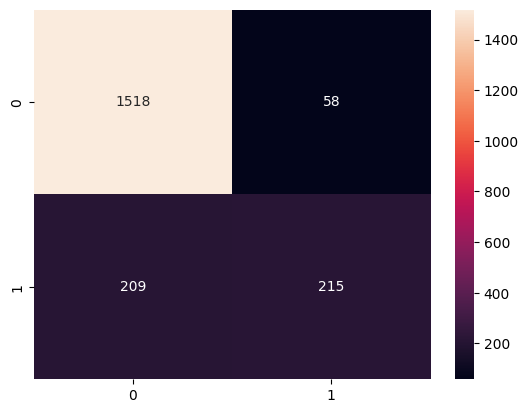

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1576
           1       0.79      0.51      0.62       424

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [29]:
(df['Exited'] == 1).sum()

np.int64(2037)

In [30]:
(df['Exited'] == 0).sum()

np.int64(7963)

Data is imbalanced it have to be balanced

In [31]:
def ANN(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
  model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (X_train.shape[1], ), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
  ])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.fit(X_train, y_train, epochs = 100)
  ypred = model.predict(X_test)
  y_pred = (ypred >= 0.5).astype(int).reshape(ypred.shape[0])
  np.mean(y_pred == y_test)
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd')

1. Undersampling


In [32]:
new_df_0 = df[df['Exited'] == 0].sample(2037)
undersampled_df = pd.concat([new_df_0, df[df['Exited'] == 1]], axis = 0)

In [33]:
X_us = undersampled_df.drop('Exited', axis = 1)
y_us = undersampled_df['Exited']

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5642 - loss: 0.6783
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6272 - loss: 0.6506
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6613 - loss: 0.6362
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6641 - loss: 0.6233
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6735 - loss: 0.6120
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6829 - loss: 0.6078
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6828 - loss: 0.6027
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7064 - loss: 0.5808
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6918 - loss: 0.5930
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6925 - loss: 0.5820
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7000 - loss: 0.5689
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

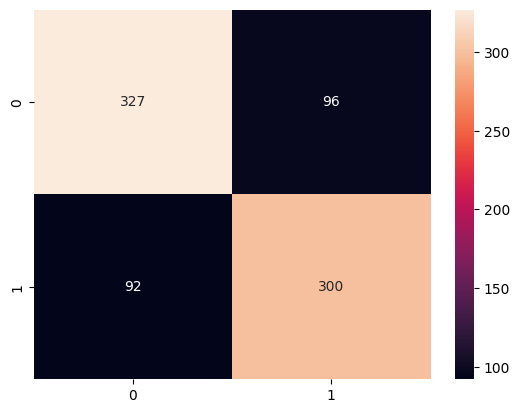

In [34]:
ANN(X_us, y_us)

2. Oversampling

In [35]:
new_df_1 = df[df['Exited'] == 1].sample(7963, replace = True)
oversampled_df = pd.concat([new_df_1, df[df['Exited'] == 0]], axis = 0)

In [36]:
X_os = oversampled_df.drop('Exited', axis = 1)
y_os = oversampled_df['Exited']

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6152 - loss: 0.6632
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6751 - loss: 0.6112
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6893 - loss: 0.5933
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7074 - loss: 0.5759
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7109 - loss: 0.5699
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7140 - loss: 0.5635
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7385 - loss: 0.5427
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7446 - loss: 0.5319
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7477 - loss: 0.5213
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7536 - loss: 0.5121
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7649 - loss: 0.4979
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

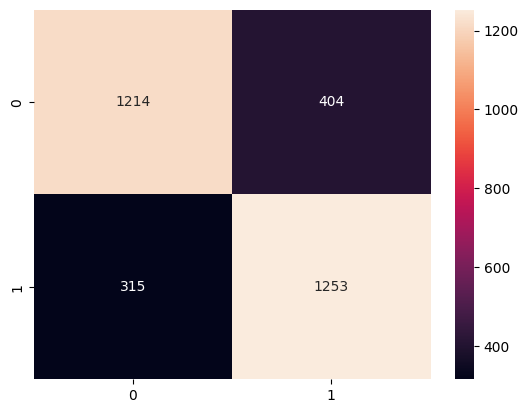

In [37]:
ANN(X_os, y_os)

3. SMOTE

In [41]:
smote = SMOTE(sampling_strategy = 'minority')
X = df.drop('Exited', axis = 1)
y = df['Exited']
X_smote, y_smote = smote.fit_resample(X, y)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5956 - loss: 0.6668
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6664 - loss: 0.6121
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6907 - loss: 0.5932
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7068 - loss: 0.5770
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7098 - loss: 0.5736
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7185 - loss: 0.5606
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7107 - loss: 0.5645
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7302 - loss: 0.5445
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7376 - loss: 0.5356
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7477 - loss: 0.5203
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7590 - loss: 0.5083
Epoch 12/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

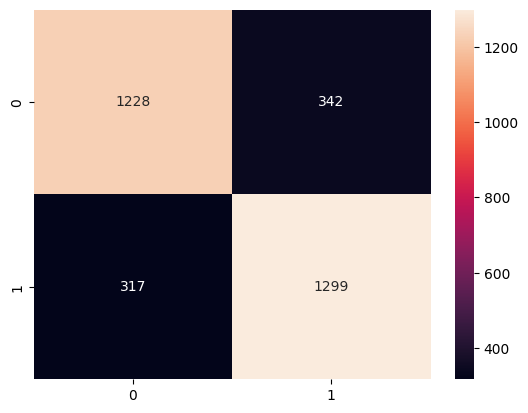

In [42]:
ANN(X_smote, y_smote)